# facial expression detection

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# A classification label, with possible values....

In [2]:
# in IEMOCAP there are six classes but in MELD,EmoryNLP and DailyDialog there are 7 classes
emo_la={0:'frustration',1:'neutral',2:'anger',3:'sadness',4:'excitement',5:'happiness'}

In [3]:
emo_la[0]

'frustration'

# Splitting Dataset into Training, Validation, and Test Sets 

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('Dataset.csv')

# First, split the dataset into training and remaining sets
# Calculate the number of samples for the remaining set (validation + testing)
remaining_size = 1000 + 1523

# Split off the remaining set from the original dataset
train_data, remaining_data = train_test_split(data, test_size=remaining_size, random_state=42)

# Now split the remaining data into validation and testing sets
val_data, test_data = train_test_split(remaining_data, test_size=1523, random_state=42)

# The size of val_data will be 1000
# The size of test_data will be 1523

# Save the splits to CSV files if needed
train_data.to_csv('train_data.csv', index=False)
val_data.to_csv('val_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

# Display the first few rows of the splits
print("Training Data:")
print(train_data.head())

print("\nValidation Data:")
print(val_data.head())

print("\nTest Data:")
print(test_data.head())

Training Data:
                 start_stop                 vid_cid label  \
4039  [190.9697 - 197.0104]  Ses03M_script01_3_M021   hap   
2697  [140.1110 - 143.1502]  Ses02M_script03_2_M026   ang   
2185    [56.6475 - 69.8700]     Ses02M_impro05_F007   neu   
3298    [56.7750 - 59.7491]  Ses03F_script02_2_M006   fru   
1231    [48.9610 - 52.0600]  Ses01M_script02_2_M006   fru   

                           VAD  \
4039  [4.0000, 2.5000, 3.5000]   
2697  [2.5000, 3.5000, 4.0000]   
2185  [2.5000, 3.0000, 3.5000]   
3298  [2.0000, 3.3333, 3.0000]   
1231  [2.5000, 3.0000, 2.5000]   

                                                   text                vid  i  \
4039  We're going to live now.  I'm going to make yo...  Ses03M_script01_3  3   
2697               What riotous time you must have had.  Ses02M_script03_2  2   
2185  Um, well, sometimes there is just difficulties...     Ses02M_impro05  2   
3298                     Okay, then what's bugging you?  Ses03F_script02_2  3   
1231  It

In [ ]:
# For EmoryNLP,MELD,DailyDialog Dataset
#data=pd.read_csv('./Dataset.csv')
#data
#val_data=pd.read_csv('./Dataset.csv')
#test_data=pd.read_csv('./Dataset.csv')

In [5]:
data['label'].value_counts() 

label
fru    1849
neu    1708
ang    1103
sad    1084
exc    1040
hap     595
Name: count, dtype: int64

For EmoryNLP Dataset

In [6]:
#import numpy as np
#data=data[~(data['label'] == "")]
#val_data=val_data[~(val_data['label'] == "")]
#test_data=test_data[~(test_data['label'] == "")]

#data.loc[data['label'] == 5.0, 'label'] = 5
#data.loc[data['label'] == 3.0, 'label'] = 3
#data.loc[data['label'] == 0.0, 'label'] = 0
#data.loc[data['label'] == 2.0, 'label'] = 2
#data.loc[data['label'] == 4.0, 'label'] = 4
#data.loc[data['label'] == 1.0, 'label'] = 1

#val_data.loc[val_data['label'] == 5.0, 'label'] = 5
#val_data.loc[val_data['label'] == 3.0, 'label'] = 3
#val_data.loc[val_data['label'] == 0.0, 'label'] = 0
#val_data.loc[val_data['label'] == 2.0, 'label'] = 2
#val_data.loc[val_data['label'] == 4.0, 'label'] = 4
#val_data.loc[val_data['label'] == 1.0, 'label'] = 1

#test_data.loc[test_data['label'] == 5.0, 'label'] = 5
#test_data.loc[test_data['label'] == 3.0, 'label'] = 3
#test_data.loc[test_data['label'] == 0.0, 'label'] = 0
#test_data.loc[test_data['label'] == 2.0, 'label'] = 2
#test_data.loc[test_data['label'] == 4.0, 'label'] = 4
#test_data.loc[test_data['label'] == 1.0, 'label'] = 1

#columns_to_remove = ['speaker']

# Remove columns from the DataFrame
#data.drop(columns=columns_to_remove, inplace=True)
#val_data.drop(columns=columns_to_remove, inplace=True)
#test_data.drop(columns=columns_to_remove, inplace=True)
#data['label'].fillna('unknown', inplace=True)
#val_data['label'].fillna('unknown', inplace=True)
#test_data['label'].fillna('unknown', inplace=True)

#data=data[~(data['label'] == 'unknown')]
#val_data=val_data[~(val_data['label'] == 'unknown')]
#test_data=test_data[~(test_data['label'] == 'unknown')]

In [7]:
data

,start_stop,vid_cid,label,VAD,text,vid,i,path
0,[6.2901 - 8.2357],Ses01F_impro01_F000,neu,"[2.5000, 2.5000, 2.5000]",Excuse me.,Ses01F_impro01,1,/home/admin/workspace/data/multimodal-sentimen...
1,[10.0100 - 11.3925],Ses01F_impro01_F001,neu,"[2.5000, 2.5000, 2.5000]",Yeah.,Ses01F_impro01,1,/home/admin/workspace/data/multimodal-sentimen...
2,[14.8872 - 18.0175],Ses01F_impro01_F002,neu,"[2.5000, 2.5000, 2.5000]",Is there a problem?,Ses01F_impro01,1,/home/admin/workspace/data/multimodal-sentimen...
3,[27.4600 - 31.4900],Ses01F_impro01_F005,neu,"[2.5000, 3.5000, 2.0000]",Well what's the problem? Let me change it.,Ses01F_impro01,1,/home/admin/workspace/data/multimodal-sentimen...
4,[38.9650 - 43.5900],Ses01F_impro01_F006,fru,"[2.0000, 3.5000, 3.5000]",What? I'm getting an ID. This is why I'm her...,Ses01F_impro01,1,/home/admin/workspace/data/multimodal-sentimen...
...,...,...,...,...,...,...,...,...
7374,[236.5700 - 244.8300],Ses05M_script03_2_M041,ang,"[1.0000, 4.5000, 5.0000]","You are a vile tempered, wicked living, evil l...",Ses05M_script03_2,5,/home/admin/workspace/data/multimodal-sentimen...
7375,[244.8400 - 246.5800],Ses05M_script03_2_M042,ang,"[1.0000, 4.5000, 4.5000]","Oh, you're not going like this.",Ses05M_script03_2,5,/home/admin/workspace/data/multimodal-sentimen...
7376,[246.5900 - 248.8300],Ses05M_script03_2_M043,ang,"[1.5000, 4.0000, 4.5000]","[GARBAGE] No, you're not.",Ses05M_script03_2,5,/home/admin/workspace/data/multimodal-sentimen...
7377,[255.8600 - 260.3300],Ses05M_script03_2_M044,ang,"[1.0000, 5.0000, 5.0000]",oh! Marry you again? I wouldn't marry you agai...,Ses05M_script03_2,5,/home/admin/workspace/data/multimodal-sentimen...


# Emotion classes Distribution

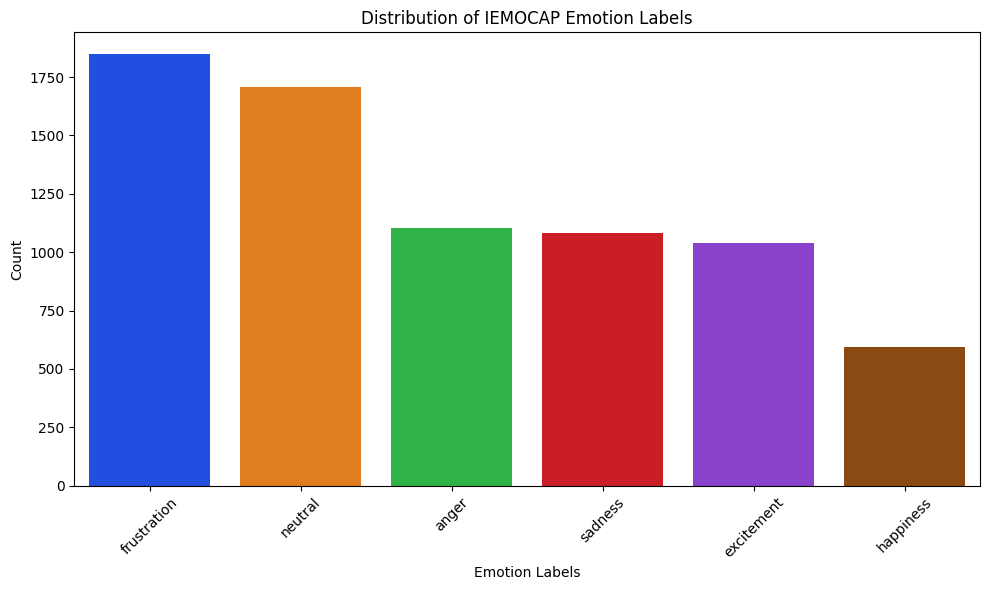

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Actual class counts for emotions and corresponding labels
class_counts = [1849, 1708, 1103, 1084, 1041, 595]
emo_la = {0: 'frustration', 1: 'neutral', 2: 'anger', 3: 'sadness', 4: 'excitement', 5: 'happiness'}

# Create DataFrame for the emotion labels and their counts
emotion_data = pd.DataFrame({
    'label': [emo_la[i] for i in range(len(class_counts))],
    'count': class_counts
})

# Plotting the distribution of Emotion Labels
plt.figure(figsize=(10, 6))
sns.barplot(x='label', y='count', data=emotion_data, hue='label', palette=sns.color_palette("bright", len(emotion_data)), dodge=False, legend=False)
plt.xlabel('Emotion Labels')
plt.ylabel('Count')
plt.title('Distribution of IEMOCAP Emotion Labels')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
val_data['label'].value_counts()

label
fru    252
neu    221
sad    156
ang    144
exc    141
hap     86
Name: count, dtype: int64

# Pre-Trained MobileBert Model

In [13]:
import torch
from torch.utils.data import DataLoader
from transformers import  AdamW

In [14]:
# Define hyperparameters
batch_size = 64
epochs = 12
lr = 2e-5
eps = 1e-8
max_grad_norm = 1.0
num_classes = 6
quantization_bits = 8

In [15]:
X_train=data['text']
y_train=data['label']
X_val=val_data['text']
y_val=val_data['label']
X_test=test_data['text']
y_test=test_data['label']

In [16]:
import torch
import transformers
from transformers import AutoTokenizer, MobileBertForSequenceClassification,DistilBertTokenizer

model_name = r'sst_mobilebert-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name)
config = transformers.MobileBertConfig(vocab_size = len(tokenizer.get_vocab()))
config.num_labels = 6
id2label = {}
# for i in range(config.num_labels):
#     id2label[i] = data_cl["label"].int2str(i)
id2label=emo_la

c:\Users\Muhammad Hussain\AppData\Local\Programs\Python\Python39\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [17]:
config.id2label = id2label
config.label2id = {v:k for k,v in id2label.items()}

model = MobileBertForSequenceClassification.from_pretrained(model_name, config=config,ignore_mismatched_sizes=True)

Some weights of MobileBertForSequenceClassification were not initialized from the model checkpoint at sst_mobilebert-uncased and are newly initialized: ['mobilebert.pooler.dense.bias', 'mobilebert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of MobileBertForSequenceClassification were not initialized from the model checkpoint at sst_mobilebert-uncased and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([3, 512]) in the checkpoint and torch.Size([6, 512]) in the model instantiated
- classifier.bias: found shape torch.Size([3]) in the checkpoint and torch.Size([6]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# Configuration Of Model

In [18]:
model.config

MobileBertConfig {
  "_name_or_path": "sst_mobilebert-uncased",
  "attention_probs_dropout_prob": 0.1,
  "classifier_activation": true,
  "classifier_dropout": null,
  "embedding_size": 128,
  "hidden_act": "relu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 512,
  "id2label": {
    "0": "frustration",
    "1": "neutral",
    "2": "anger",
    "3": "sadness",
    "4": "excitement",
    "5": "happiness"
  },
  "initializer_range": 0.02,
  "intermediate_size": 512,
  "intra_bottleneck_size": 128,
  "key_query_shared_bottleneck": true,
  "label2id": {
    "anger": 2,
    "excitement": 4,
    "frustration": 0,
    "happiness": 5,
    "neutral": 1,
    "sadness": 3
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "mobilebert",
  "normalization_type": "no_norm",
  "num_attention_heads": 4,
  "num_feedforward_networks": 4,
  "num_hidden_layers": 24,
  "pad_token_id": 0,
  "transformers_version": "4.44.0",
  "trigram_input": true,
  "true_hidden_size": 128,


**Encoding and tokenization text data before passing to the model**

In [19]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# Replace 'your_model_name' with the actual model name you are using
model_name = 'sst_mobilebert-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, ignore_mismatched_sizes=True)

# Assuming X_train, X_val, and X_test are pandas Series
X_train_list = X_train.tolist()
X_val_list = X_val.tolist()
X_test_list = X_test.tolist()

# Encode the data
encoded_data_train = tokenizer.batch_encode_plus(
    X_train_list,
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    max_length=64,
    return_tensors='pt'
)

encoded_data_val = tokenizer.batch_encode_plus(
    X_val_list,
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    max_length=64,
    return_tensors='pt'
)

encoded_data_test = tokenizer.batch_encode_plus(
    X_test_list,
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    max_length=64,
    return_tensors='pt'
)

# Ensure labels are numeric
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Move input tensors to the same device as the model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

input_ids_train = encoded_data_train['input_ids'].to(device)
attention_masks_train = encoded_data_train['attention_mask'].to(device)
labels_train = torch.tensor(y_train_encoded).to(device)

input_ids_val = encoded_data_val['input_ids'].to(device)
attention_masks_val = encoded_data_val['attention_mask'].to(device)
labels_val = torch.tensor(y_val_encoded).to(device)

input_ids_test = encoded_data_test['input_ids'].to(device)
attention_masks_test = encoded_data_test['attention_mask'].to(device)
labels_test = torch.tensor(y_test_encoded).to(device)

model.to(device)  # Move the model to the same device

Some weights of MobileBertForSequenceClassification were not initialized from the model checkpoint at sst_mobilebert-uncased and are newly initialized: ['mobilebert.pooler.dense.bias', 'mobilebert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of MobileBertForSequenceClassification were not initialized from the model checkpoint at sst_mobilebert-uncased and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([3, 512]) in the checkpoint and torch.Size([6, 512]) in the model instantiated
- classifier.bias: found shape torch.Size([3]) in the checkpoint and torch.Size([6]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate e

MobileBertForSequenceClassification(
  (mobilebert): MobileBertModel(
    (embeddings): MobileBertEmbeddings(
      (word_embeddings): Embedding(30522, 128, padding_idx=0)
      (position_embeddings): Embedding(512, 512)
      (token_type_embeddings): Embedding(2, 512)
      (embedding_transformation): Linear(in_features=384, out_features=512, bias=True)
      (LayerNorm): NoNorm()
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): MobileBertEncoder(
      (layer): ModuleList(
        (0-23): 24 x MobileBertLayer(
          (attention): MobileBertAttention(
            (self): MobileBertSelfAttention(
              (query): Linear(in_features=128, out_features=128, bias=True)
              (key): Linear(in_features=128, out_features=128, bias=True)
              (value): Linear(in_features=512, out_features=128, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): MobileBertSelfOutput(
              (dense): Linear(in_fe

**Using Dataloader to pass data in batches for training the model**

In [20]:
from torch.utils.data import (DataLoader, RandomSampler, SequentialSampler,
                              TensorDataset)
dataset_train = TensorDataset(input_ids_train, 
                              attention_masks_train,
                              labels_train)

dataset_val = TensorDataset(input_ids_val, 
                            attention_masks_val,
                           labels_val)
dataset_test=TensorDataset(input_ids_test, 
                            attention_masks_test,
                           labels_test)

In [21]:
dataloader_train = DataLoader(
    dataset_train,
    sampler=RandomSampler(dataset_train),
    batch_size=batch_size
)

dataloader_val = DataLoader(
    dataset_val,
    sampler=RandomSampler(dataset_val),
    batch_size=32
)
dataloader_test = DataLoader(
    dataset_test,
    sampler=RandomSampler(dataset_test),
    batch_size=32
)

** Focal Weighted Loss and adversarial training

In [22]:
import torch
from torch.nn import Module
import torch.nn.functional as F
from transformers import AdamW, get_linear_schedule_with_warmup
from collections import Counter
from sklearn.metrics import classification_report

# Assuming these variables are defined:
# model, device, lr, eps, epochs, dataloader_train, dataloader_val, dataloader_test, y_train, num_classes

# Initialize device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Example: Calculate class weights based on the training labels
class_counts = Counter(y_train)  # y_train should be your training labels
total_samples = sum(class_counts.values())

# Handle the case where a class has zero samples
class_weights = []
for i in range(num_classes):
    if class_counts[i] > 0:
        class_weights.append(total_samples / class_counts[i])
    else:
        class_weights.append(1.0)  # Assign a default weight (e.g., 1.0) for classes with zero samples

class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

class FocalWeightedLoss(Module):
    def __init__(self, alpha=0.25, gamma=2.0, focal_weight=0.5, class_weights=None):
        super(FocalWeightedLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.focal_weight = focal_weight
        self.class_weights = class_weights

    def forward(self, inputs, targets):
        # Ensure targets are of dtype long
        targets = targets.long()

        # Compute weighted categorical cross-entropy loss
        weighted_ce_loss = F.cross_entropy(inputs, targets, weight=self.class_weights)

        # Compute focal loss
        probs = F.softmax(inputs, dim=1)
        pt = probs.gather(1, targets.view(-1, 1)).squeeze()
        focal_weight = (1 - pt) ** self.gamma
        focal_loss = self.alpha * focal_weight * F.cross_entropy(inputs, targets, reduction='none')

        # Combine the two losses
        combined_loss = (1.0 - self.focal_weight) * weighted_ce_loss + self.focal_weight * focal_loss.mean()

        return combined_loss

# Create an instance of the FocalWeightedLoss
focal_weighted_loss_fn = FocalWeightedLoss(alpha=0.25, gamma=2.0, focal_weight=0.5, class_weights=class_weights)

# Define optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=lr, eps=eps)
total_steps = len(dataloader_train) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# FGSM Attack function for adversarial training
def fgsm_attack(model, inputs, labels, attention_mask, epsilon):
    # Access the embedding layer through the MobileBertModel
    inputs_embeds = model.mobilebert.embeddings.word_embeddings(inputs).detach()
    inputs_embeds.requires_grad = True
    outputs = model(inputs_embeds=inputs_embeds, attention_mask=attention_mask)
    loss = F.cross_entropy(outputs.logits, labels.long())
    model.zero_grad()
    loss.backward()
    data_grad = inputs_embeds.grad.data
    perturbed_embeds = inputs_embeds + epsilon * data_grad.sign()
    return perturbed_embeds

c:\Users\Muhammad Hussain\AppData\Local\Programs\Python\Python39\lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


**Model Training**

In [23]:
# Training loop with FGSM adversarial training
epsilon = 0.1  # Perturbation magnitude
max_grad_norm = 1.0  # Maximum gradient norm for clipping

for epoch in range(epochs):
    model.train()
    total_loss = 0.0

    for step, batch in enumerate(dataloader_train):
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        loss = focal_weighted_loss_fn(logits, labels)  # Use FocalWeightedLoss
        total_loss += loss.item()

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()

        # FGSM Adversarial Training
        perturbed_embeds = fgsm_attack(model, input_ids, labels, attention_mask, epsilon)
        outputs_adv = model(inputs_embeds=perturbed_embeds, attention_mask=attention_mask)
        logits_adv = outputs_adv.logits
        loss_adv = focal_weighted_loss_fn(logits_adv, labels)
        loss_adv.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()

    average_loss = total_loss / len(dataloader_train)
    print(f'Epoch {epoch + 1}/{epochs}, Average Loss: {average_loss:.4f}')

Epoch 1/12, Average Loss: 0.9390
Epoch 2/12, Average Loss: 0.8828
Epoch 3/12, Average Loss: 0.7571
Epoch 4/12, Average Loss: 0.6849
Epoch 5/12, Average Loss: 0.6343
Epoch 6/12, Average Loss: 0.6061
Epoch 7/12, Average Loss: 0.5951
Epoch 8/12, Average Loss: 0.5975
Epoch 9/12, Average Loss: 0.6004
Epoch 10/12, Average Loss: 0.5960
Epoch 11/12, Average Loss: 0.5961
Epoch 12/12, Average Loss: 0.5959


**Model Validation**

In [25]:
# Evaluate on validation set
model.eval()
total_val_loss, total_val_accuracy = 0, 0

with torch.no_grad():
    for batch in dataloader_val:
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)
        
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        
        # Calculate loss using FocalWeightedLoss
        loss = focal_weighted_loss_fn(logits, labels)
        
        # Calculate accuracy
        _, predicted_labels = torch.max(logits, 1)
        correct_predictions = (predicted_labels == labels).sum().item()

        num_samples = labels.size(0)
        accuracy = correct_predictions / num_samples
        total_val_accuracy += accuracy

        total_val_loss += loss.item()

    avg_val_loss = total_val_loss / len(dataloader_val)
    avg_val_accuracy = total_val_accuracy / len(dataloader_val)

print(f'Validation Loss: {avg_val_loss:.4f} - Validation Accuracy: {avg_val_accuracy:.4f}')

Validation Loss: 0.5746 - Validation Accuracy: 0.6309


**Testing Model**

In [26]:
# Evaluate on test set
model.eval()
total_test_loss, total_correct, total_samples = 0, 0, 0
y_test_pred = []
y_true = []

with torch.no_grad():
    for batch in dataloader_test:
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        
        # Calculate loss using FocalWeightedLoss
        loss = focal_weighted_loss_fn(logits, labels)

        # Convert logits to predicted labels
        predicted_labels = torch.argmax(logits, dim=1)

        # Accumulate predictions and true labels for evaluation
        y_test_pred.extend(predicted_labels.tolist())
        y_true.extend(labels.tolist())

        # Calculate total loss
        total_test_loss += loss.item()

        # Calculate total correct predictions
        total_correct += (predicted_labels == labels).sum().item()

        # Accumulate total samples
        total_samples += labels.size(0)

    # Calculate average loss
    avg_test_loss = total_test_loss / len(dataloader_test)

    # Calculate accuracy
    test_accuracy = total_correct / total_samples

print(f'Test Loss: {avg_test_loss:.4f} - Test Accuracy: {test_accuracy:.4f}')

Test Loss: 0.5605 - Test Accuracy: 0.6297


In [27]:
from sklearn.metrics import confusion_matrix
# y_pred=predict_bert(test_set[:50])
confusion_matrix(y_test_pred, y_true)

array([[124,   5,  34,   1,   7,   2],
       [  5, 144,   3,  48,  24,   3],
       [ 71,   7, 241,   2,  60,  13],
       [  1,  11,   3,  38,   5,   2],
       [ 28,  27,  72,  19, 232,  26],
       [ 11,   8,  27,   4,  35, 180]], dtype=int64)

**Confusion Matrix**

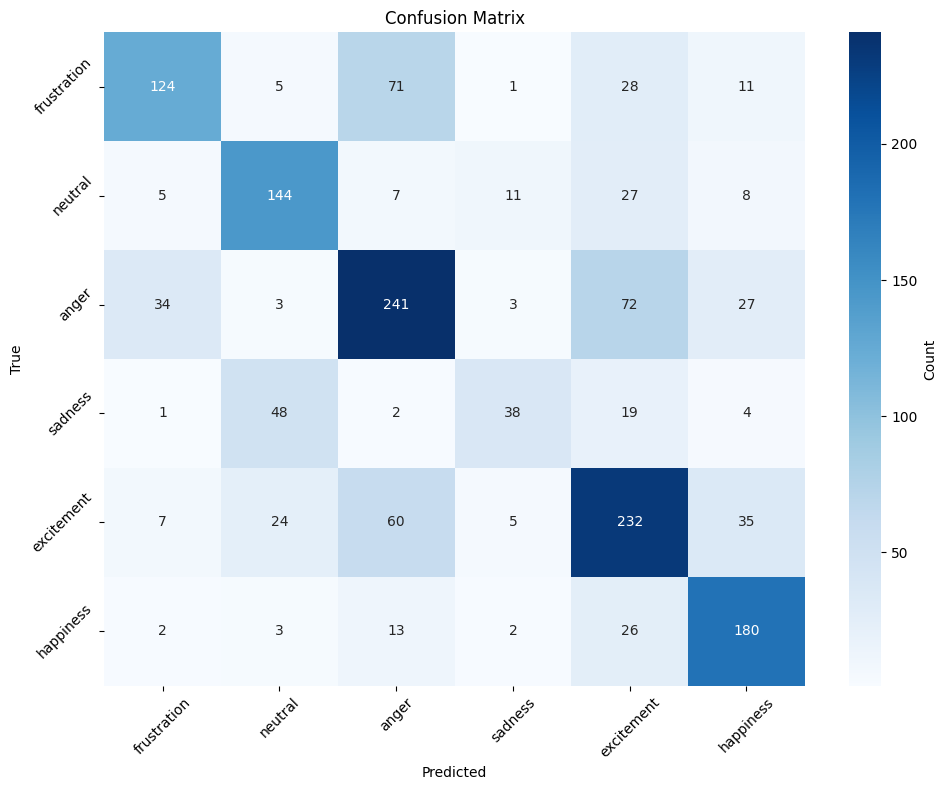

In [28]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_test_pred)

# Plot confusion matrix with heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['frustration', 'neutral', 'anger', 'sadness', 'excitement', 'happiness'], yticklabels=['frustration', 'neutral', 'anger', 'sadness', 'excitement', 'happiness'], cbar_kws={'label': 'Count'})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

**Classification Report**

In [29]:
 from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test_pred, y_true))
print(accuracy_score( y_true, y_test_pred))
print(emo_la)

              precision    recall  f1-score   support

           0       0.52      0.72      0.60       173
           1       0.71      0.63      0.67       227
           2       0.63      0.61      0.62       394
           3       0.34      0.63      0.44        60
           4       0.64      0.57      0.60       404
           5       0.80      0.68      0.73       265

    accuracy                           0.63      1523
   macro avg       0.61      0.64      0.61      1523
weighted avg       0.65      0.63      0.63      1523

0.6296782665791202
{0: 'frustration', 1: 'neutral', 2: 'anger', 3: 'sadness', 4: 'excitement', 5: 'happiness'}
